In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

# **Introduction**

Consider a simple linear SDE: $dx_t = f(x_t)dt + \sigma dW_t, f(x_t) = \alpha x_t + \beta$.

Where $\alpha$, $\beta$ and $\sigma$ are all constants and $W_t$ is a standard Wiener process.

### **How does $\alpha$ influence the SDE process?**:
The $\alpha$ controls rate of growth or decay.

### **How does $\beta$ influence the SDE process?**:
The $\beta$ shifts the process up or down.

### **What happens when $\alpha$ is 0?**:
The process reduces to brownian motion with drift.


### **What is the analytical solution of the SDE?**:
We are given $dx_t = (\alpha x_t + \beta)dt + \sigma dW_t$ and want to find $x_t$.

We introduce integrating factor $e^{-\alpha t}$, multiply both sides with it and move the $\alpha$ term to the left.

$e^{-\alpha t}dx_t - \alpha e^{-\alpha t} x_t dt = \beta e^{-\alpha t} dt + \sigma e^{-\alpha t} dW_t$

Left hand side is a total derivative $e^{-\alpha t}dx_t - \alpha e^{-\alpha t} x_t dt = d(e^{-\alpha t}x_t)$

Integrate both sides from 0 to t: $x_t e^{-\alpha t} = x_0 + \beta \int_0^t e^{-\alpha s} ds + \int_0^t \sigma e^{-\alpha s} dW_s$

For $\beta \int_0^t  e^{-\alpha s} ds $ we know that $\int e^{-\alpha s} ds = - \frac{1}{\alpha}e^{-\alpha s} + C$

The definite integral over interval 0 to t is $\int_0^t  e^{-\alpha s} ds  = [- \frac{1}{\alpha}e^{-\alpha s}]_0^t = - \frac{1}{\alpha}e^{-\alpha t} + \frac{1}{\alpha}e^{0} = \frac{1}{\alpha}(1 - e^{-\alpha t})$.

Multiply in beta and we get $\frac{\beta}{\alpha}(1 - e^{-\alpha t})$

Multiply both sides with $e^{\alpha t}$ and we get $x_t = x_0 e^{\alpha t} + \frac{\beta}{\alpha}(e^{\alpha t} - 1) + \sigma e^{\alpha t} \int_0^t  e^{-\alpha s} dW_s$


### **What is the expectation of the analytical solution?**:

The expectation when $\alpha \neq 0$ is given by $E[x_t] = E[x_0e^{\alpha t} + \frac{\beta}{\alpha}(e^{\alpha t} - 1) + + \sigma e^{\alpha t} \int_0^t  e^{-\alpha s} dW_s]$

Linearity of expectation gives us $E[x_t] = x_0e^{\alpha t} + \frac{\beta}{\alpha}(e^{\alpha t} - 1) + \sigma e^{\alpha t} E[\int_0^t  e^{-\alpha s} dW_s]$

The expected value of brownian motion is zero, and if f(s) is deterministic and square-integrable then $E[\int_0^t  e^{-\alpha s} dW_s] = 0$. This also follows as $E[M_t] = E[M_0]$ as the ito integral is a martingale.

Finally this gives us that $E[x_t] = x_0e^{\alpha t} + \frac{\beta}{\alpha}(e^{\alpha t} - 1)$

###  **What does the expection converge to when $\alpha < 0$? What about when $\alpha > 0$?**:
When $\alpha < 0$, the expectation converges to $-\beta / \alpha$, when $\alpha > 0$, it doesnt converge but instead grows exponentially.

### Simulate using the Euler-Maruyama method for $\alpha=1$, $\alpha=-1$ and $\alpha=0$ and confirm your findings and explain them in text below.
Its a bit hard to actually confirm anything except $\alpha=1$, maybe need to rethink this task.

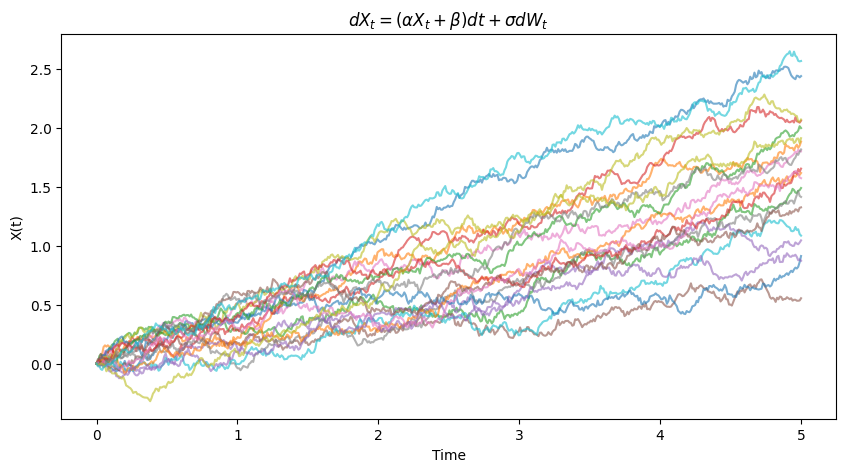

In [10]:
# Set this yourself.
alpha = 0

# Parameters  
beta = 0.3   
sigma = 0.2
X0 = 0.0
T = 5.0
dt = 0.01
N = int(T / dt)
M = 20 # Generate M different outcomes.

t = np.linspace(0, T, N)
X = np.zeros((M, N))
X[:, 0] = X0

# Sample 
for i in range(M):
    # Sample brownian
    ## YOUR CODE HERE
    ## ANSWER ##
    W = np.random.normal(0, np.sqrt(dt), N-1)
    ## END ANSWER ##
    for j in range(1, N):
        # Compute next time step
        ## ANSWER ##
        X[i, j] = X[i, j-1] + (alpha * X[i, j-1] + beta) * dt + sigma * W[j-1]
        ## END ANSWER ##

# Plot results
plt.figure(figsize=(10, 5))
for i in range(M):
    plt.plot(t, X[i, :], alpha=0.6)

plt.xlabel("Time")
plt.ylabel("X(t)")
plt.title("$dx_t = (\\alpha x_t + \\beta)dt + \\sigma dW_t$")
plt.show()


# **Concentration of measure**

### **The radius of a Gaussian can be expressed in terms of a Chi-Square distribution with d-degrees of freedom.** 

Let $X = (X_1, X_2, ..., X_d)$ be a d-dimensional standard Gaussian vector where $X_i \sim \mathcal{N}(0,1)$.

The euclidian norm and radius of $X$ is: $R = ||X|| = \sqrt{X_1^2 + X_2^2 + ... + X_d^2}$ 

As each $X_i^2$ is a chi-square distribution with one degree of freedom, the sum $S = X_1^2 + X_2^2 + ... + X_d^2$ is a chi-square distribution with $d$ degrees of freedom: $S \sim \chi^2_d$

Since $R = \sqrt{S}$ then $R = \sim \chi_d$.

The normalized radius is $Y = R / \sqrt{d}$ as the euclidian norm scales with $\sqrt{d}$ which gives us $Y = \sqrt{\frac{S}{d}}$.

Using $S \sim \chi^2_d$ again, we get that $Y = \sqrt{\frac{\chi^2_d}{d}}$

### **Task 1:** Derive an expression for $\mathbb{E}[Y]$ and $\text{Var}[Y]$ and approximate its value when $d \rightarrow \infty$

*Expectation and variance (easier version)*

We are interested in $\mathbb{E}[Y] = \mathbb{E}[\sqrt{\frac{\chi^2_d}{d}}]$.
Lets define $Z \sim \frac{\chi^2_d}{d} =  \frac{1}{d} \cdot \chi^2_d$ so that we are instead looking for $\mathbb{E}[\sqrt{Z}]$.

As this is a chi-squared variable, and the expectation of a chi-squared variable of degree d is d then $\mathbb{E}[Z] = \frac{d}{d} = 1$
We can do the same thing for variance as the variance for a chi-squared variable of degree d is 2d then $\text{Var}(Z) = \frac{2d}{d^2} = \frac{2}{d}$ as $\text{Var}(aX) = a^2\text{Var}(X)$.

As we are interested in $\mathbb{E}[\sqrt{Z}]$ and we know $\mathbb{E}[Z] = 1$, we can approximate $f(Z) = \sqrt{Z}$ around Z = 1 using taylor expansion.

$\sqrt{Z} \approx f(1) + f'(1)(Z - 1) + \frac{1}{2}f''(1)(Z-1)^2$  
<br>
$f(1) = 1$   
<br>

$f'(1) = \frac{1}{2}$  
<br>

$f''(1) = -\frac{1}{4}$   

Using that gives us that $\sqrt{Z} \approx 1 + \frac{1}{2}(Z - 1) - \frac{1}{8}(Z-1)^2$   

We take the expectation: $\mathbb{E}[\sqrt{Z}] \approx 1 + \frac{1}{2}\mathbb{E}[(Z - 1)] - \frac{1}{8}\mathbb{E}[(Z-1)^2]$ 

We know that $\mathbb{E}[(Z - 1)] = 0$ as $\mathbb{E}[Z] = 1$

And $\mathbb{E}[(Z-1)^2] = \text{Var}(Z) = \frac{2}{d}$ as $\text{Var}(Z) = \mathbb{E}[(Z-E[Z])^2]$

Then $\mathbb{E}[\sqrt{Z}] \approx 1 - \frac{1}{4d}$.

As d goes to infinity, the second term goes to zero and the expected value goes to 1.

For variance, we take the variance of the same approximation $\text{Var}(\sqrt{Z}) \approx \text{Var}(1 + \frac{1}{2}(Z - 1) - \frac{1}{8}(Z-1)^2)$

We have two terms dependent on Z, $a = \frac{1}{2}(Z - 1)$ and $b = \frac{1}{8}(Z-1)^2$.

The variance is then $\text{Var}(\sqrt{Z}) \approx \text{Var}(a + b) = \text{Var}(a) + \text{Var}(b) + 2 \cdot \text{Cov}(a,b)$

$\text{Var}(a) = (\frac{1}{2})^2\text{Var}(Z) = \frac{1}{4} \cdot \frac{2}{d} = \frac{1}{2d} $

$\text{Var}(b) = (\frac{1}{8})^2\text{Var}((Z-1)^2)$, this term is smaller, $\text{Var}(a)$ dominates (smaller than $\Delta t$)

$\text{Cov}(a,b)$, this term is also smaller than $\text{Var}(a)$. (smaller than $\Delta t$)


Thus $\text{Var}(\sqrt{Z}) \approx \frac{1}{2d}$ which when $d \rightarrow \infty$ goes towards 0. 





*!!!OLD AND NOT USED!!! Expectation (long derivation)*

$\mathbb{E}[Y] = \mathbb{E}[\sqrt{\frac{\chi^2_d}{d}}] = \frac{1}{\sqrt{d}}\mathbb{E}[\sqrt{\chi^2_d}] = \frac{1}{\sqrt{d}}\mathbb{E}[\chi_d]$.

The expected value of a chi-distribution is $\mathbb{E}[\chi_d] = \sqrt{2} \cdot \frac{\Gamma(\frac{d+1}{2})}{\Gamma(\frac{d}{2})}$.

Thus $\mathbb{E}[Y] = \frac{\sqrt{2}}{\sqrt{d}}  \cdot \frac{\Gamma(\frac{d+1}{2})}{\Gamma(\frac{d}{2})}$.

*Expectation goes to infinity*

To evaluate the Gamma function at large d, we can use the Stirling approximation $\Gamma(z) \approx \sqrt{2\pi} \cdot z^{z-\frac{1}{2}} \cdot e^{-z}$. 

Then: 

$\frac{\Gamma(\frac{d+1}{2})}{\Gamma(\frac{d}{2})} \approx \frac{(\frac{d+1}{2})^{\frac{d}{2}} \cdot e^{-\frac{d+1}{2}}}{(\frac{d}{2})^{\frac{d}{2}-\frac{1}{2}} \cdot e^{-\frac{d}{2}}}$.


The exponentials in that fraction becomes: $\frac{e^{-\frac{d+1}{2}}}{e^{-\frac{d}{2}}} = e^{-\frac{1}{2}}$

The remaining part is: $\frac{(\frac{d+1}{2})^{\frac{d}{2}} }{(\frac{d}{2})^{\frac{d}{2}-\frac{1}{2}}} = (\frac{\frac{d+1}{2}}{\frac{d}{2}})^{\frac{d}{2}} \cdot (\frac{1}{\frac{d}{2}})^{-\frac{1}{2}}$

Lets evaluate the left term first.

$\frac{\frac{d+1}{2}}{\frac{d}{2}} = \frac{d + 1}{d} = 1 + \frac{1}{d}$

Insert that into our exponential.

$(1 + \frac{1}{d})^{\frac{d}{2}} \approx e^{\frac{1}{2}}$  due to that  $e = (1 + \frac{1}{n})^{n}, n \rightarrow \infty$.

Now lets evaluate the right term.

$(\frac{1}{\frac{d}{2}})^{-\frac{1}{2}} = (\frac{d}{2})^{\frac{1}{2}} = \sqrt{\frac{d}{2}}$

This gives us that $\frac{\Gamma(\frac{d+1}{2})}{\Gamma(\frac{d}{2})} \approx e^{-\frac{1}{2}} \cdot e^{\frac{1}{2}} \cdot \sqrt{\frac{d}{2}} = \sqrt{\frac{d}{2}}$

Since we wanted to evaluate $\mathbb{E}[Y]$ at $d \rightarrow \infty$ then $\mathbb{E}[Y] = \frac{\sqrt{2}}{\sqrt{d}} \cdot \frac{\Gamma(\frac{d+1}{2})}{\Gamma(\frac{d}{2})} \approx \frac{\sqrt{2}}{\sqrt{d}} \cdot \sqrt{\frac{d}{2}} = 1$

*Answer*: The expected value of $\mathbb{E}[Y]$ goes towards 1 when $d \rightarrow \infty$.


### **Task 2:** Simulate and confirm the results

We can see how the distribution of radii are squeezed into a more and more narrow range with variance 0 and mean 1 as d goes to infinity.

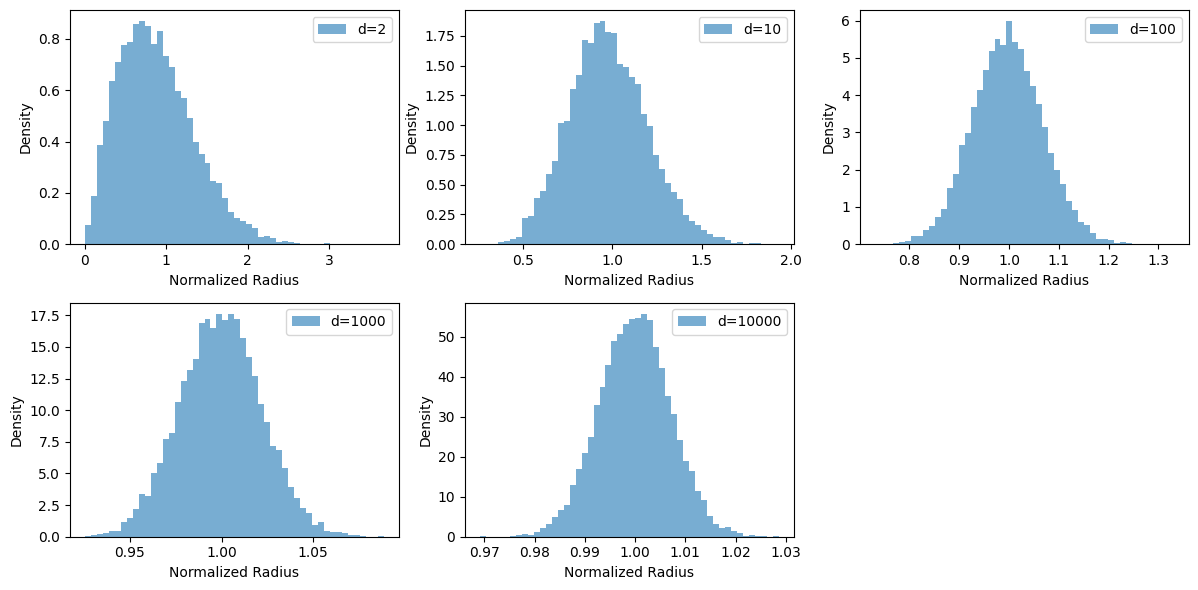

   Dimension (d)  Radius Mean  Radius Variance
0              2     0.882827         0.213160
1             10     0.975960         0.048347
2            100     0.996992         0.004991
3           1000     0.999587         0.000496
4          10000     0.999914         0.000050


In [14]:
# Parameters
dimensions = [2, 10, 100, 1000, 10000]
num_samples = 10000

means = []
variances = []

plt.figure(figsize=(12, 6))

for i, d in enumerate(dimensions):
    # Generate gaussians
    X = np.random.randn(num_samples, d)
    R = np.linalg.norm(X, axis=1)
    R_normalized = R / np.sqrt(d)
    
    means.append(np.mean(R_normalized))
    variances.append(np.var(R_normalized))
    
    # Plot
    plt.subplot(2, 3, i + 1)
    plt.hist(R_normalized, bins=50, density=True, alpha=0.6, label=f"d={d}")
    
    plt.xlabel("Normalized Radius")
    plt.ylabel("Density")
    plt.legend()

plt.tight_layout()
plt.show()

df_results_normalized = pd.DataFrame({
    "Dimension (d)": dimensions,
    "Radius Mean": means,
    "Radius Variance": variances
})

print(df_results_normalized)


# **Îtos Lemma**

Consider the geometric brownian motion $dx_t = \mu x_t dt + \sigma x_t dW_t$.

We define a transformation $Y_t = \phi(x_t) = \ln(x_t)$.

### **Task 1:** Derive the SDE $dY_t$ for $Y_t$ using Îtos Lemma.

Solution:
$dY_t = \phi'(x_t)dx_t + \frac{1}{2}\phi''(x_t)(dx_t)^2$

$\phi'(x_t) = \frac{1}{x_t}$

$\phi''(x_t) = -\frac{1}{x_t^2}$

$dY_t = \frac{1}{x_t}dx_t + \frac{1}{2}(-\frac{1}{x_t^2})(dx_t)^2$

$(dx_t)^2 = (\mu x_t dt + \sigma x_t dW_t)^2$

$(dx_t)^2 = \mu^2x_t^2dt^2 + 2\mu x_t \sigma x_t dtdW_t + \sigma^2 x_t^2 (dW_t)^2)^2$

$(dt)^2$ is extremely tiny -> can approximate to 0.

$dtdW_t$ is also tiny as $dW_t$ is of order $\sqrt{dt}$ and $dt$ is miniscule. -> Can approximate to 0.

For $(dW_t)^2$ we know $W_t \sim \mathcal{N}(0,1)$, and since $\text{Var}[X] = E[X^2] - (E[X])^2 \rightarrow E[X^2] = \text{Var}[X] + (E[X])^2$ and we know $\mathbb{E}[dW_t] = 0$ then $\mathbb{E}[(dW_t)^2] = \text{Var}[dW_t] = dt$

This gives us that $(dx_t)^2 = \sigma^2 x_t^2 dt$

Substitute in $(dx_t)^2$ and $dx_t$ into $dY_t$

$dY_t = \frac{1}{x_t}(\mu x_t dt + \sigma x_t dW_t)+ \frac{1}{2}(-\frac{1}{x_t^2})(\sigma^2 x_t^2 dt)$

Simplify: $dY_t = \mu dt + \sigma dW_t - \frac{\sigma^2}{2}dt$

**Answer:** $dY_t = (\mu - \frac{\sigma^2}{2}) dt + \sigma dW_t$

### **Task 2:**: Simulate both $Y_t$ using the derived SDE and $x_t$ (transformed after simulating) and confirm that they have the same results. Dont forget to use shared generated noise.


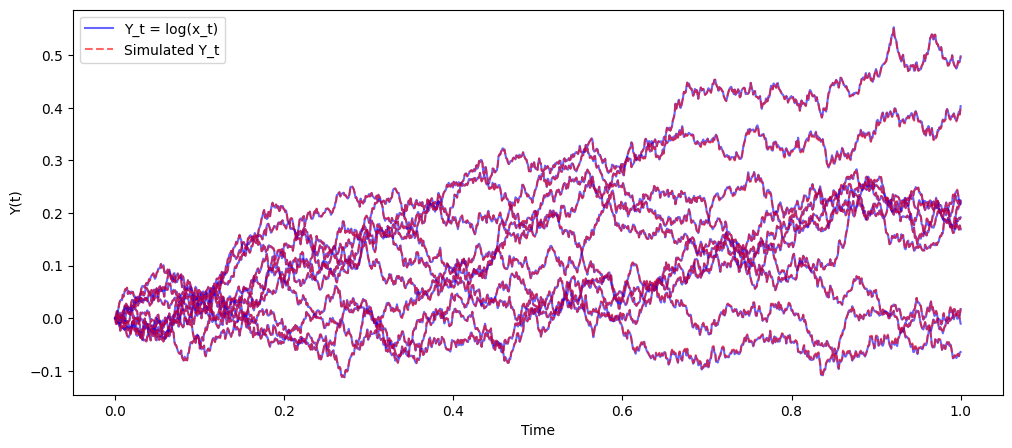

In [15]:
# Parameters
mu = 0.1
sigma = 0.2
X0 = 1
T = 1.0 
dt = 0.001
N = int(T / dt)
M = 10 

time_grid = np.linspace(0, T, N)

X = np.zeros((M, N))
Y_transformed = np.zeros((M, N))
Y_simulated = np.zeros((M, N))

# Start
X[:, 0] = X0
Y_transformed[:, 0] = np.log(X0)
Y_simulated[:, 0] = np.log(X0)

# Shared Wiener process
W_shared = np.random.normal(0, np.sqrt(dt), (M, N-1))

# Simulate x_t
for i in range(M):
    for j in range(1, N):
        X[i, j] = X[i, j-1] + mu * X[i, j-1] * dt + sigma * X[i, j-1] * W_shared[i, j-1]
        Y_transformed[i, j] = np.log(X[i, j])  # Applying transformation after simulating x_t

# Simulate Y_t using derived SDE
for i in range(M):
    for j in range(1, N):
        Y_simulated[i, j] = Y_simulated[i, j-1] + (mu - 0.5 * sigma**2) * dt + sigma * W_shared[i, j-1]

# Plot results
plt.figure(figsize=(12, 5))
for i in range(M):
    plt.plot(time_grid, Y_transformed[i, :], color='blue', alpha=0.6, label="Y_t = log(x_t)" if i == 0 else "")
    plt.plot(time_grid, Y_simulated[i, :], color='red', alpha=0.6, linestyle='dashed', label="Simulated Y_t" if i == 0 else "")

plt.xlabel("Time")
plt.ylabel("Y(t)")
plt.legend()
plt.show()

# **Riemann integral approximation** 

The Ornstein-Uhlenbeck process $dx_t = -\theta x_t dt + \sigma dW_t$ has the following analytical solution: $x_t = x_0e^{-\theta t} + \sigma e^{-\theta t} \int_{s=0}^t e^{\theta s}dW_s$.

### **Task 1:** Approximate the integral using Riemann sums.

First we discretize the time into uniform steps $t_0 = 0, t_1, \dots, t_n = t$ with step size $\Delta t$ such that $t_i = i \cdot \Delta t$ and $\Delta t = \frac{t}{n}$.

The Riemann approximation of the integral of a function $f(t)$ is $\int_0^t f(s)ds \approx \sum_{i=0}^{n-1}f(t_i) \cdot \Delta t$.

We apply it to our stochastic integral using the assumption (which is wrong) that $dW_s = W_s \cdot \Delta t$ : $\int_{s=0}^t e^{\theta s}dW_s \approx_{\text{Riemann}} \sum_{i=0}^{n-1}e^{\theta t_i} \cdot W_{t_i} \cdot \Delta t$.

Put the Riemann approximation into our solution for Ornstein-Uhlenbeck: $x_t \approx x_0e^{-\theta t} + \sigma e^{-\theta t} \sum_{i=0}^{n-1}e^{\theta t_i} \cdot W_{t_i} \cdot \Delta t$

For an Itô approximation, we can discretize time: $t_0 =0 < t_1 < \dots < t_n = t$ with step size $\Delta t$ and let $\Delta W_i = W_{t_{i+1}} - W_{t_i} \sim N(0, \delta t)$.

Then use that to approximate our stochastic integral: $\int_{s=0}^t e^{\theta s}dW_s \approx \sum_{i=0}^{n-1} e^{\theta t_i} \cdot \Delta W_i $

Which gives us: $x_t \approx x_0e^{-\theta t} + \sigma e^{-\theta t} \sum_{i=0}^{n-1} e^{\theta t_i} \cdot \Delta W_i$.

### **Task 2:** Simulate $x_t$ using both the Riemann approximation and the Euler-Maruyama method.


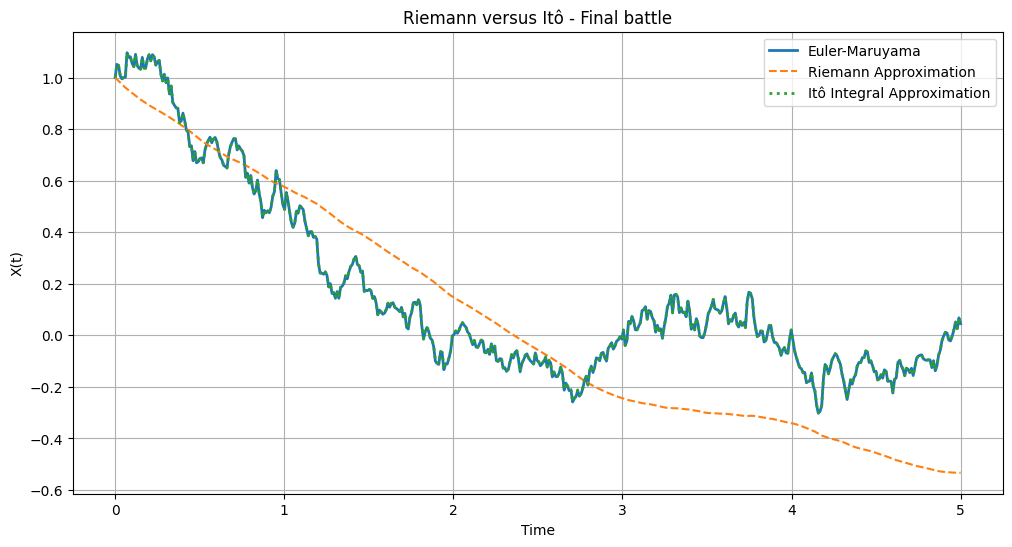

In [19]:
# Parameters
theta = 0.7
sigma = 0.3
x0 = 1.0
T = 5.0
dt = 0.01
N = int(T / dt)
t = np.linspace(0, T, N)

# Single shared Wiener process
dW = np.random.normal(0, np.sqrt(dt), N)
W = np.cumsum(dW)

# Euler-Maruyama
x_euler = np.zeros(N)
x_euler[0] = x0
for i in range(1, N):
    x_euler[i] = x_euler[i-1] - theta * x_euler[i-1] * dt + sigma * dW[i-1]

# Riemann
x_riemann = np.zeros(N)
for j in range(N):
    kernel = np.exp(theta * t[:j])
    integral_approx = np.sum(kernel * W[:j] * dt)
    x_riemann[j] = x0 * np.exp(-theta * t[j]) + sigma * np.exp(-theta * t[j]) * integral_approx

# Itô
x_ito = np.zeros(N)
for j in range(N):
    kernel = np.exp(theta * t[:j])
    integral_ito = np.sum(kernel * dW[:j])
    x_ito[j] = x0 * np.exp(-theta * t[j]) + sigma * np.exp(-theta * t[j]) * integral_ito

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(t, x_euler, label='Euler-Maruyama', linewidth=2)
plt.plot(t, x_riemann, label='Riemann Approximation', linestyle='--')
plt.plot(t, x_ito, label='Itô Integral Approximation', linestyle=':', linewidth=2)
plt.title("Riemann versus Itô - Final battle")
plt.xlabel("Time")
plt.ylabel("X(t)")
plt.legend()
plt.grid(True)
plt.show()
